In [1]:
from shapely import Point , LineString , LinearRing , Polygon , MultiPoint , MultiLineString , MultiPolygon

# 1.矩形剪裁

## shapely.ops.clip_by_rect(geom, xmin, ymin, xmax, ymax)

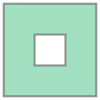

In [2]:
from shapely.ops import clip_by_rect

polygon = Polygon(shell=[(0, 0), (0, 30), (30, 30), (30, 0), (0, 0)],
                  holes=[[(10, 10), (20, 10), (20, 20), (10, 20), (10, 10)]])
polygon

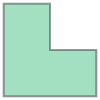

In [3]:
# 矩形剪裁
clipped_polygon = clip_by_rect(polygon , 5,5,15,15)
clipped_polygon

<AxesSubplot:>

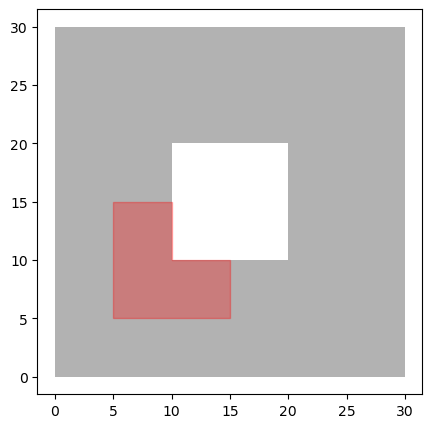

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

f,ax = plt.subplots(figsize=(5,5))

gpd.GeoDataFrame([polygon] , columns=["geometry"]).plot(ax=ax , facecolor="k" ,alpha=0.3)
gpd.GeoDataFrame([clipped_polygon] , columns=["geometry"]).plot(ax=ax , facecolor="red" , edgecolor="red" ,alpha=0.3)

# 2.高效合并

## shapely.ops.unary_union(geoms)

### 返回给定几何对象的合并结果。

In [5]:
from shapely.ops import unary_union

polygons = [Point(i,0).buffer(0.7) for i in range(5)]
polygons

[<POLYGON ((0.7 0, 0.697 -0.069, 0.687 -0.137, 0.67 -0.203, 0.647 -0.268, 0.6...>,
 <POLYGON ((1.7 0, 1.697 -0.069, 1.687 -0.137, 1.67 -0.203, 1.647 -0.268, 1.6...>,
 <POLYGON ((2.7 0, 2.697 -0.069, 2.687 -0.137, 2.67 -0.203, 2.647 -0.268, 2.6...>,
 <POLYGON ((3.7 0, 3.697 -0.069, 3.687 -0.137, 3.67 -0.203, 3.647 -0.268, 3.6...>,
 <POLYGON ((4.7 0, 4.697 -0.069, 4.687 -0.137, 4.67 -0.203, 4.647 -0.268, 4.6...>]

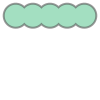

In [6]:
unary_union(polygons)

Text(0.5, 1.0, 'b) union')

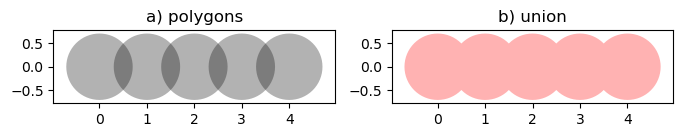

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

f,ax = plt.subplots(1,2,figsize=(8,8))

for ob in polygons:
    gpd.GeoDataFrame([ob] , columns=["geometry"]).plot(ax=ax[0] , facecolor="k" ,alpha=0.3)
    
gpd.GeoDataFrame([unary_union(polygons)] , columns=["geometry"]).plot(ax=ax[1] , facecolor="red",alpha=0.3)

ax[0].set_title('a) polygons')
ax[1].set_title('b) union')

### 因为合并了重叠的多边形区域，所以该方法可以用来修复无效的多边形。与零距离buffer()操作的技巧一样，在使用这个方法时，依实际情况可能有差别。

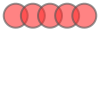

In [8]:
m = MultiPolygon(polygons)
m

In [9]:
m.area

7.684543801837549

In [10]:
m.is_valid

False

In [11]:
unary_union(m).area

6.610301355116799

In [12]:
unary_union(m).is_valid

True

# 3.狄洛尼三角剖分

## shapely.ops.triangulate(geom, tolerance=0.0, edges=False)

### 返回输入几何对象的狄洛尼三角剖分图。

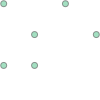

In [13]:
from shapely.ops import triangulate

points = MultiPoint([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
points

In [14]:
# edges参数默认为False，结果将返回三角形polygon的列表
triangulate(points)

[<POLYGON ((0 2, 0 0, 1 1, 0 2))>,
 <POLYGON ((0 2, 1 1, 2 2, 0 2))>,
 <POLYGON ((2 2, 1 1, 3 1, 2 2))>,
 <POLYGON ((3 1, 1 1, 1 0, 3 1))>,
 <POLYGON ((1 0, 1 1, 0 0, 1 0))>]

<AxesSubplot:>

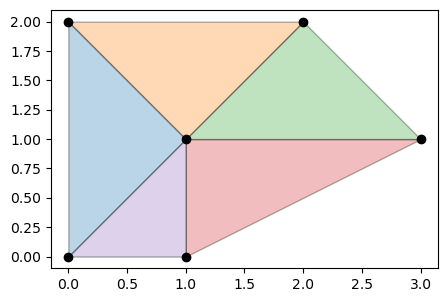

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

color_palette = sns.color_palette()

f,ax = plt.subplots(figsize=(5,5))

for i , ob in enumerate(triangulate(points)):
    gpd.GeoDataFrame([ob] , columns=["geometry"]).plot(ax=ax , facecolor=color_palette[i] ,edgecolor="k"  , alpha=0.3)
gpd.GeoDataFrame([points] , columns=["geometry"]).plot(ax=ax , facecolor="k")

### edges=True

In [16]:
triangulate(points , edges=True)

[<LINESTRING (2 2, 3 1)>,
 <LINESTRING (0 2, 2 2)>,
 <LINESTRING (0 0, 0 2)>,
 <LINESTRING (0 0, 1 0)>,
 <LINESTRING (1 0, 3 1)>,
 <LINESTRING (1 0, 1 1)>,
 <LINESTRING (1 1, 3 1)>,
 <LINESTRING (1 1, 2 2)>,
 <LINESTRING (0 2, 1 1)>,
 <LINESTRING (0 0, 1 1)>]

<AxesSubplot:>

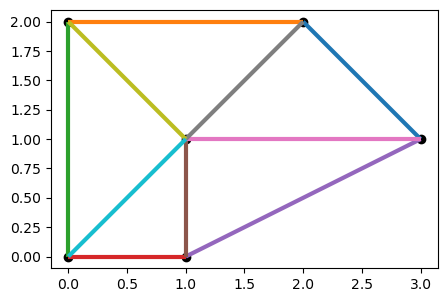

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

color_palette = sns.color_palette()

f,ax = plt.subplots(figsize=(5,5))

for i , ob in enumerate(triangulate(points , edges=True)):
    gpd.GeoDataFrame([ob] , columns=["geometry"]).plot(ax=ax , facecolor="none" , edgecolor=color_palette[i] ,linewidth=3)
gpd.GeoDataFrame([points] , columns=["geometry"]).plot(ax=ax , facecolor="k")

# 4.泰森多边形

## shapely.ops.voronoi_diagram(geom, envelope=None, tolerance=0.0, edges=False)

### 通过输入几何对象的顶点构建一个泰森多边形。

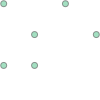

In [18]:
from shapely.ops import voronoi_diagram

points = MultiPoint([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
points

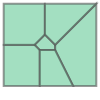

In [19]:
# edges参数默认为False，结果将返回三角形polygon的列表
regions = voronoi_diagram(points)
regions

In [20]:
list(regions.geoms)

[<POLYGON ((2 1, 2 0.5, 0.5 0.5, 0 1, 1 2, 2 1))>,
 <POLYGON ((6 -3, 3.75 -3, 2 0.5, 2 1, 6 5, 6 -3))>,
 <POLYGON ((-3 -3, -3 1, 0 1, 0.5 0.5, 0.5 -3, -3 -3))>,
 <POLYGON ((0.5 -3, 0.5 0.5, 2 0.5, 3.75 -3, 0.5 -3))>,
 <POLYGON ((-3 5, 1 5, 1 2, 0 1, -3 1, -3 5))>,
 <POLYGON ((6 5, 2 1, 1 2, 1 5, 6 5))>]

In [21]:
len(regions.geoms)

6

<AxesSubplot:>

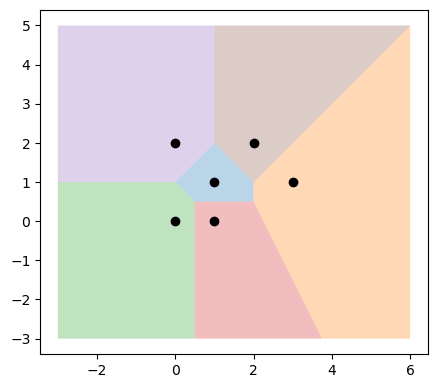

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

color_palette = sns.color_palette()

f,ax = plt.subplots(figsize=(5,5))

for i , ob in enumerate(regions.geoms):
    gpd.GeoDataFrame([ob] , columns=["geometry"]).plot(ax=ax , facecolor=color_palette[i] ,alpha=0.3)
gpd.GeoDataFrame([points] , columns=["geometry"]).plot(ax=ax , facecolor="k")

### edges=True

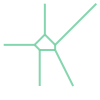

In [23]:
regions_2 = voronoi_diagram(points , edges=True)
regions_2

In [24]:
list(regions_2.geoms)

[<MULTILINESTRING ((2 1, 2 0.5), (2 0.5, 0.5 0.5), (0.5 0.5, 0 1), (0 1, 1 2)...>]

In [25]:
len(regions_2.geoms)

1

<AxesSubplot:>

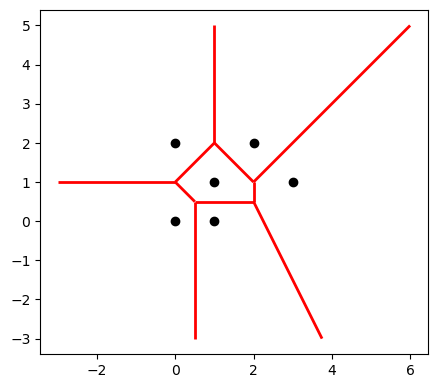

In [26]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

color_palette = sns.color_palette()

f,ax = plt.subplots(figsize=(5,5))

gpd.GeoDataFrame([regions_2.geoms] , columns=["geometry"]).plot(ax=ax , edgecolor="red" ,linewidth=2)
gpd.GeoDataFrame([points] , columns=["geometry"]).plot(ax=ax , facecolor="k")